We need to evaluate features we can try and improve and restore for photos, this includes - 
    - Blurriness
    - Blemishes
    - Colour Faded/Low Saturations, etc

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Sharpening Photos 

In [57]:
photo = cv2.imread('sample-photos/old_photo_01.jpg')

k = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]],dtype=float)
k = k / k.sum()
sharp = cv2.filter2D(photo, -1, k)

cv2.imshow('Original Image', photo)
cv2.imshow('Sharp Photo', sharp)

key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

Increasing brightness if brightness is below a certain threshold

In [59]:
grey = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)

brightness = np.mean(grey) #mean to get brightness
brightened = sharp

# if image has low brightness
if brightness < 100:
    gamma = 1.5
    brightened = np.power(sharp / 255.0, 1 / gamma)
    brightened = np.uint8(brightened * 255)

# showing all for testing purposes
cv2.imshow('Original Image', photo)
cv2.imshow('Sharp Photo', sharp)
cv2.imshow('Brightened Image', brightened)
key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

thresholding or masking

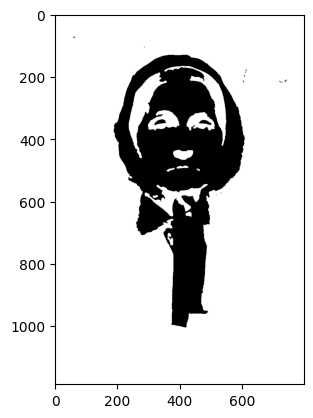

In [43]:
hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

_, thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

mask_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_open)
plt.imshow(mask_open, cmap='gray')



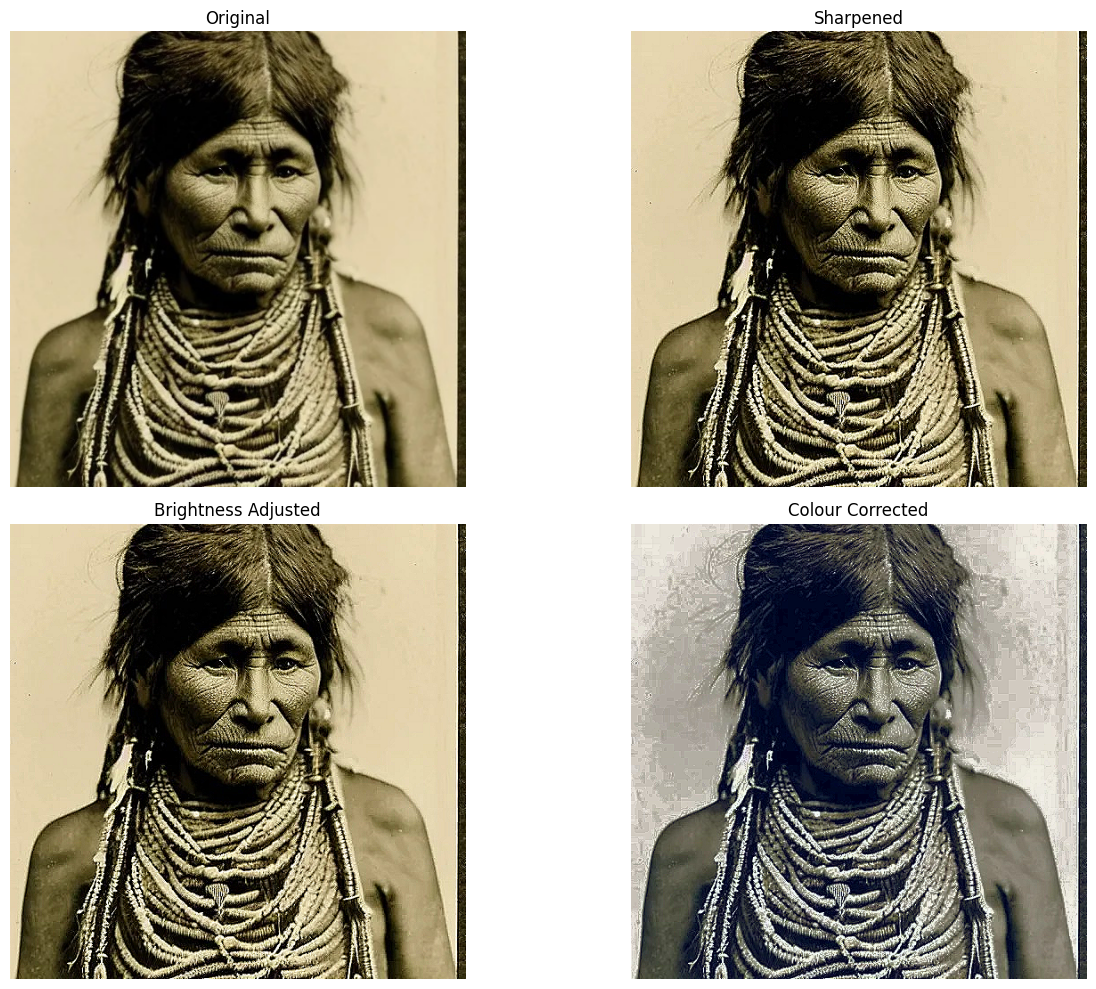

In [ ]:
# libraries imported

import cv2
import numpy as np
import matplotlib.pyplot as plt

# functions for each processing step
def sharpen_image(photo):
    """Apply sharpening kernel."""
    k = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]], dtype=float)
    k = k / k.sum()
    sharp = cv2.filter2D(photo, -1, k)
    return sharp


def adjust_brightness(photo, threshold=100, gamma=1.5):
    gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray)

    if brightness < threshold:
        corrected = np.power(photo / 255.0, 1 / gamma)
        corrected = np.uint8(corrected * 255)
        return corrected
    
    return photo


def extract_masks(photo):
    hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
    _, _, v = cv2.split(hsv)

    _, thresh = cv2.threshold(
        v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    return thresh, opened

def colour_correction(photo):
    photo_ycrcb = cv2.cvtColor(photo, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(photo_ycrcb)
    
    cr_corrected = cr - (np.mean(cr) - 128)
    cb_corrected = cb - (np.mean(cb) - 128)

    cr_corrected = np.clip(cr_corrected, 0, 255).astype(np.uint8)
    cb_corrected = np.clip(cb_corrected, 0, 255).astype(np.uint8)

    y_eq = cv2.equalizeHist(y)
    
    img_ycrcb_corrected = cv2.merge((y_eq, cr_corrected, cb_corrected))
    final_img = cv2.cvtColor(img_ycrcb_corrected, cv2.COLOR_YCrCb2BGR)

    return final_img
    

# showing results
def show_results(original, sharp, brightened, corrected):
    """Display images in matplotlib."""
    plt.figure(figsize=(14, 10))

    images = [original, sharp, brightened, corrected]
    titles = ["Original", "Sharpened", "Brightness Adjusted", "Colour Corrected"]
    cmaps  = [None, None, None, None]

    for i, (img, title, cmap) in enumerate(zip(images, titles, cmaps), 1):
        plt.subplot(2, 2, i)
        if cmap:
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# main processing pipeline
photo = cv2.imread('sample-photos/old_photo_03.jpg')

sharp = sharpen_image(photo)
brightened = adjust_brightness(sharp)
_, opened_mask = extract_masks(photo)
corrected = colour_correction(brightened)

show_results(photo, sharp, brightened, corrected)
